# Exercise 1

#### English

For the exercise you must look for another dataset for classification available at the UCI and
perform the following tasks:


* Import data using ucimlrepo.

* Analyze the dataset, generating visualizations.

* Perform data pre-processing by treating object type attributes, null values, normalization and dimensionality reduction.

* Split data for training and testing.

* Train four different classifiers by adjusting their hyperparameters using
cross validation.

* Generate visualizations for the following accuracy, precision and recall metrics.

* Generate the confusion matrix for each classifier.

* Plot the decision regions for the classifiers.

###### Restrictions

The dataset used for this exercise must contain a significant number of records
(i.e., thousands of data points), have null values ​​for processing and also have multiple
labels (i.e., > 2).


#### Português

Para o exercício você deve procurar outro dataset para classicação disponível no UCI e
realizar as seguintes tarefas:


*   Realizar a importação dos dados utilizando o ucimlrepo.

*   Analizar o dataset, gerando visualizações.

*   Realizar o pré-processamento dos dados tratanto atributos to tipo object, valores nulos, normalização e redução de dimensionalidade.

*   Fazer o split dos dados para treino e teste.

*   Treinar quatro classicadores diferentes ajustantando seus hiperparâmetros utilizando
validação cruzada.

*   Gerar visualizações para as seguintes métricas de acurácia, precision e recall.

*   Gerar a matriz de confusão para cada classicador.

*   Plotar as regiões de decisão para os classificadores.

###### Restrições

O dataset utilizado para esse exercício deve conter uma quantidade signicativa de registros
(i.e., milhares de dados), possuir valores nulos para tratamento e também possuir múltiplos
rótulos (i.e., > 2).

## Installing UCI **Repository**

In [1]:
pip install ucimlrepo

## Downloading and importing dataset

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets


## Data visualization of Dataset

### Describing data

In [31]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,47621.0,0.296448,0.185739,0.0,0.150685,0.273973,0.424658,1.0
workclass,47621.0,0.493362,0.171482,0.0,0.500000,0.500000,0.500000,1.0
fnlwgt,47621.0,0.120046,0.071422,0.0,0.071239,0.112303,0.152515,1.0
education,47621.0,0.686003,0.257092,0.0,0.600000,0.733333,0.800000,1.0
education-num,47621.0,0.606055,0.171221,0.0,0.533333,0.600000,0.733333,1.0
marital-status,47621.0,0.434434,0.250991,0.0,0.333333,0.333333,0.666667,1.0
occupation,47621.0,0.478885,0.297745,0.0,0.214286,0.500000,0.714286,1.0
relationship,47621.0,0.286428,0.320256,0.0,0.000000,0.200000,0.600000,1.0
race,47621.0,0.917872,0.210550,0.0,1.000000,1.000000,1.000000,1.0
sex,47621.0,0.670650,0.469982,0.0,0.000000,1.000000,1.000000,1.0


In [38]:
filter = y['income'] == '<=50K'
len(y[filter])

24720

In [62]:
import seaborn as sns

sns.pairplot(X, hue='sex')

Error in callback <function flush_figures at 0x7baccfd7a440> (for post_execute):


KeyboardInterrupt: 

## Data cleanup and transformation

### Removing dots from y values

In [54]:
y = y.income.str.replace('.', '')

### Check the null values

In [3]:
X.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


## Removing rows with null values

The number of rows with null values is insignificant based on the size of the dataset

In [4]:
X.dropna(axis=0, inplace=True)

<ipython-input-4-ba3fe2310123>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(axis=0, inplace=True)


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47621 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47621 non-null  int64 
 1   workclass       47621 non-null  object
 2   fnlwgt          47621 non-null  int64 
 3   education       47621 non-null  object
 4   education-num   47621 non-null  int64 
 5   marital-status  47621 non-null  object
 6   occupation      47621 non-null  object
 7   relationship    47621 non-null  object
 8   race            47621 non-null  object
 9   sex             47621 non-null  object
 10  capital-gain    47621 non-null  int64 
 11  capital-loss    47621 non-null  int64 
 12  hours-per-week  47621 non-null  int64 
 13  native-country  47621 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.4+ MB


### Removing the dropped indexes from y dataframe

In [6]:
idx = y.index.difference(X.index)
y.drop(index=idx, inplace=True)
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47621 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   income  47621 non-null  object
dtypes: object(1)
memory usage: 744.1+ KB


<ipython-input-6-33f314af8021>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.drop(index=idx, inplace=True)


### Applying data encoding

In [7]:
from sklearn.preprocessing import LabelEncoder

features_object = X.dtypes == 'object'
features_object = X.columns[features_object]
features_object



Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

### Before encoding

In [8]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [9]:
for feature in features_object:
  X[feature] = LabelEncoder().fit_transform(X[feature])

<ipython-input-9-febeec1a82a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = LabelEncoder().fit_transform(X[feature])
<ipython-input-9-febeec1a82a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = LabelEncoder().fit_transform(X[feature])
<ipython-input-9-febeec1a82a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

### After encoding

In [10]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5


## Normalize Data

In [11]:
from sklearn.preprocessing import MinMaxScaler

for feature in X.columns:
  X[feature] = MinMaxScaler().fit_transform(X[[feature]])

<ipython-input-11-76be8a84a737>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = MinMaxScaler().fit_transform(X[[feature]])
<ipython-input-11-76be8a84a737>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = MinMaxScaler().fit_transform(X[[feature]])
<ipython-input-11-76be8a84a737>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

### Reducing dimensionality

In [12]:
pip install seaborn matplotlib

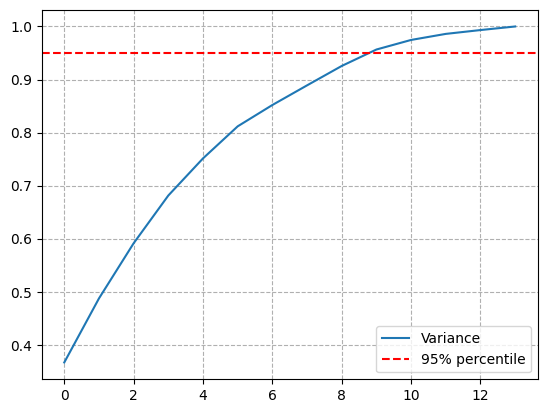

In [13]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_), label='Variance')
plt.axhline(0.95, color='red', linestyle='--', label='95% percentile')
plt.grid(True, linestyle='--')
plt.legend()

#### It will be used 9 *componets*

In [14]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X)

## Classifiers

### Spliting data

In [14]:
idx = y.index.difference(X.index)

In [15]:
y.drop(index=idx, inplace=True)

y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47621 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   income  47621 non-null  object
dtypes: object(1)
memory usage: 744.1+ KB


<ipython-input-15-367e1d464ec2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.drop(index=idx, inplace=True)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

### Tuning Hyperparameters & Cross Validation

#### KNN

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Text(0, 0.5, 'Mean Accuracy')

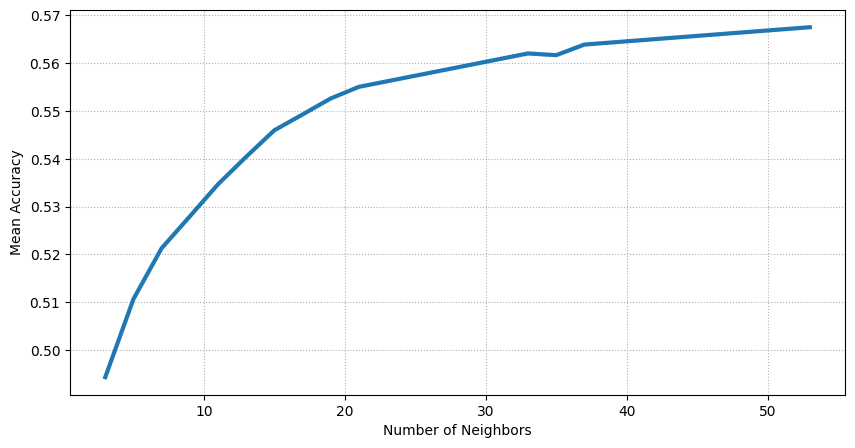

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns

ks = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 37, 33, 35, 53]
accs = []
for k in ks:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  scores = cross_val_score(knn, X_train, y_train, cv=5)
  accs.append(scores.mean())

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=ks, y=accs, linewidth=3, ax=ax)
plt.grid(True, linestyle=':')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Accuracy')

### Define classifiers

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

classifiers = {
  'KNN': KNeighborsClassifier(n_neighbors=41),
  'SVM': SVC(),
  'DT' : DecisionTreeClassifier(),
  'RF' : RandomForestClassifier(),
  'LR' : LogisticRegression(),
  'NB' : GaussianNB()
}

### Training classifiers

In [63]:
import time

training_accuracy = {}
training_time     = {}

for classifier in classifiers:
  start_time = time.process_time()
  classifiers[classifier].fit(X_train, y_train)
  training_accuracy[classifier] = classifiers[classifier].score(X_train, y_train)
  training_time[classifier] = time.process_time() - start_time

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

<ipython-input-22-11b4ffc158b3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(training_accuracy.keys()), y=list(training_accuracy.values()), ax=ax[0], ec='k', palette='pastel')
<ipython-input-22-11b4ffc158b3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(training_time.keys()), y=list(training_time.values()), ax=ax[1], ec='k', palette='husl')


Text(0.5, 1.0, 'Training Time')

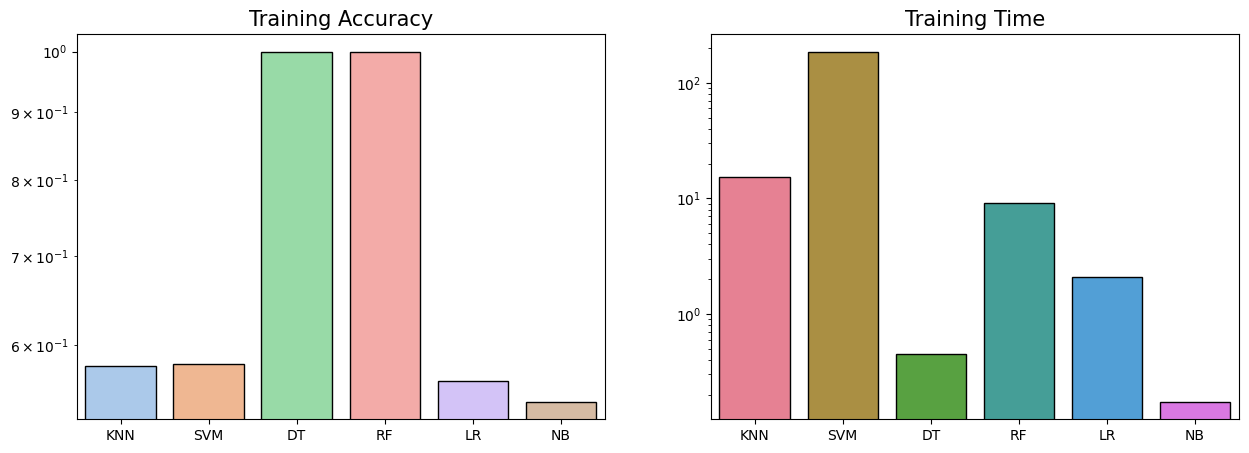

In [22]:
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x=list(training_accuracy.keys()), y=list(training_accuracy.values()), ax=ax[0], ec='k', palette='pastel')
sns.barplot(x=list(training_time.keys()), y=list(training_time.values()), ax=ax[1], ec='k', palette='husl')

ax[0].set_yscale('log')
ax[0].set_title('Training Accuracy', size=15)
ax[1].set_yscale('log')
ax[1].set_title('Training Time', size=15)

# Ploting Test Data Performance

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

metrics = {}
for classifier in classifiers:
  metrics[classifier] = {}
  predictions = classifiers[classifier].predict(X_test)
  metrics[classifier]['accuracy'] = accuracy_score(y_test, predictions)
  metrics[classifier]['recall'] = recall_score(y_test, predictions, average="weighted")
  metrics[classifier]['f1'] = f1_score(y_test, predictions, average="weighted")
  metrics[classifier]['precision'] = precision_score(y_test, predictions, average="weighted")
result = pd.DataFrame(metrics)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
result

,KNN,SVM,DT,RF,LR,NB
accuracy,0.562259,0.574508,0.459929,0.550570,0.560510,0.538882
recall,0.562259,0.574508,0.459929,0.550570,0.560510,0.538882
f1,0.459952,0.459868,0.461737,0.497360,0.446106,0.434663
precision,0.464744,0.387889,0.463732,0.483968,0.494739,0.456732


<ipython-input-66-9a893b5d4724>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(result.columns), y=list(result.iloc[0]), ax=ax[0][0], ec='k', palette='pastel')
<ipython-input-66-9a893b5d4724>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(result.columns), y=list(result.iloc[1]), ax=ax[0][1], ec='k', palette='husl')
<ipython-input-66-9a893b5d4724>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(result.columns), y=list(result.iloc[2]), ax=ax[1][0], ec='k', palette='deep')
<ipython-input-66-9a893b5d4724>:6: FutureWarnin

Text(0.5, 1.0, 'F1')

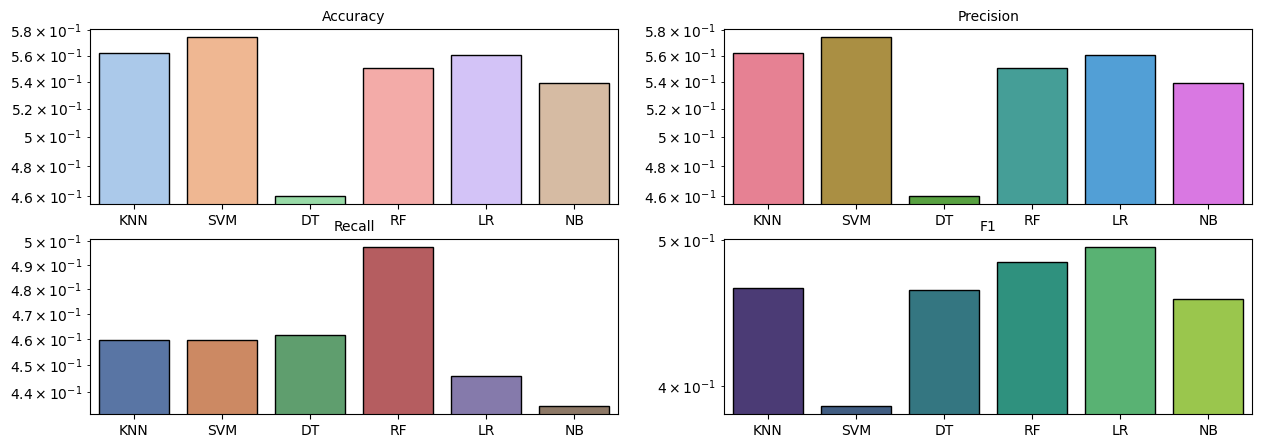

In [66]:
fig, ax = plt.subplots(2, 2, figsize=(15, 5))

sns.barplot(x=list(result.columns), y=list(result.iloc[0]), ax=ax[0][0], ec='k', palette='pastel')
sns.barplot(x=list(result.columns), y=list(result.iloc[1]), ax=ax[0][1], ec='k', palette='husl')
sns.barplot(x=list(result.columns), y=list(result.iloc[2]), ax=ax[1][0], ec='k', palette='deep')
sns.barplot(x=list(result.columns), y=list(result.iloc[3]), ax=ax[1][1], ec='k', palette='viridis')


ax[0][0].set_yscale('log')
ax[0][0].set_title('Accuracy', size=10)
ax[0][1].set_yscale('log')
ax[0][1].set_title('Precision', size=10)
ax[1][0].set_yscale('log')
ax[1][0].set_title('Recall', size=10)
ax[1][1].set_yscale('log')
ax[1][1].set_title('F1', size=10)

## Confusion matrix

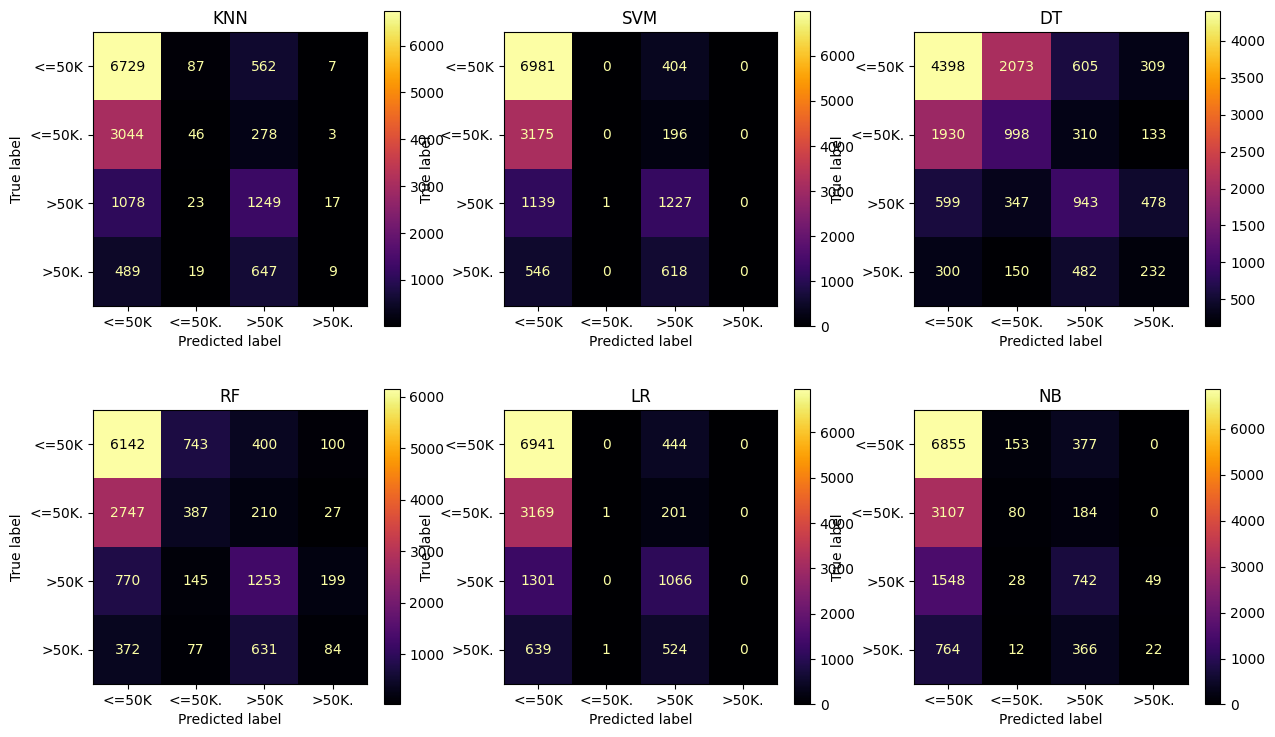

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))
ax = ax.flatten()

for idx, clf in enumerate(classifiers):
  predictions = classifiers[clf].predict(X_test)
  cm = confusion_matrix(y_test, predictions, )
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifiers[clf].classes_, )
  disp.plot(ax=ax[idx], cmap='inferno')
  ax[idx].set_title(clf)

# Visualization Region

In [27]:
pip install mlxtend

In [92]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=1)
dados_pca = pca.fit_transform(X)
x_treino, x_teste, y_treino, y_teste = train_test_split(dados_pca, y, test_size=0.3, random_state=99, shuffle=True)

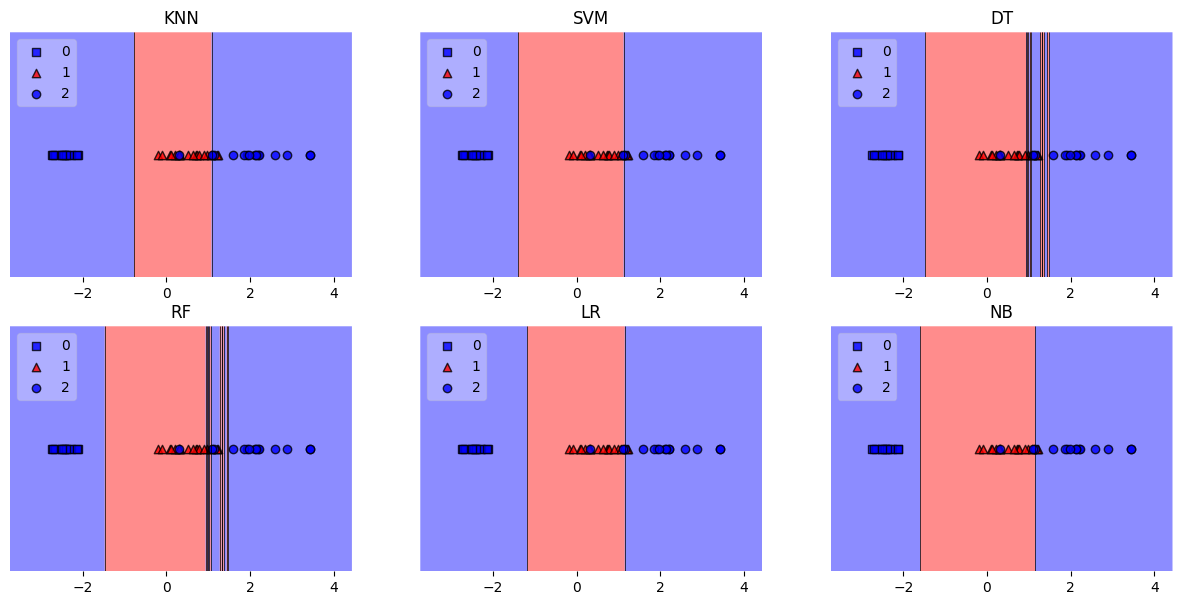

In [93]:
from mlxtend.plotting import plot_decision_regions

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
ax = ax.flatten()

for idx, clf in enumerate(classifiers):
  classifiers[clf].fit(x_treino, y_treino)
  plot_decision_regions(x_teste, y_teste, clf=classifiers[clf], legend=2, ax=ax[idx], colors='blue,red')
  ax[idx].set_title(clf)